# The Penniless Pilgrim



**Introduction**

Our group information :
>20194465 - Phạm Cát Vũ  - vu.pc194465@sis.hust.edu.vn

>20194454 - Phạm Việt Thành - thanh.pv194454@sis.hust.edu.vn

>20194421 - Phạm Văn Cường - cuong.pv194421@sis.hust.edu.vn

Our topic will be about a **modified version** of the Penniless Pilgrim Problem.

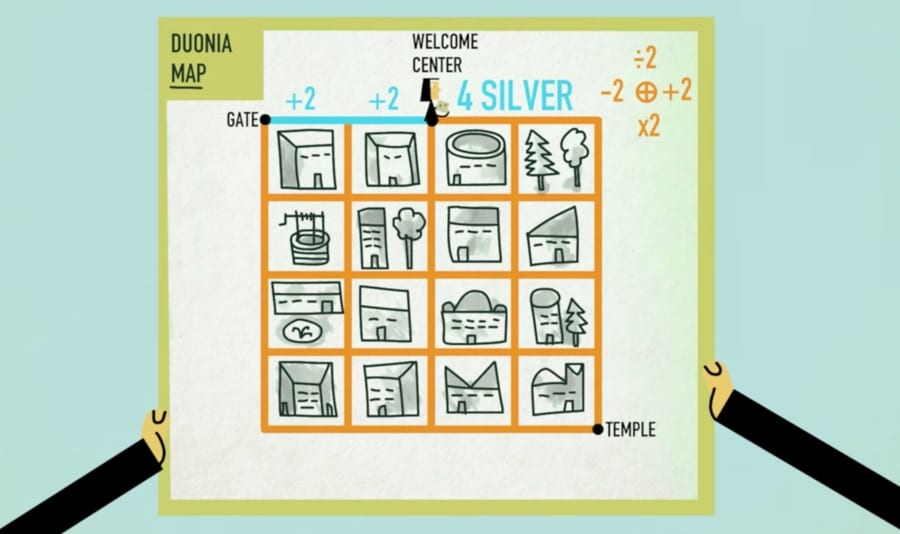

**The rules are:**
>At the gate you have 0 tax, every time you walk through a block, your tax is modified : go East add N1, go West subtract N2, go North divide by N3, go South multiply by N4.(N1, N2, N3, N4 are random integer from 2 to 5) Ex. : From the gate, go East twice, tax = 2+2 (the starting point of the original problem, here N1, N2, N3, N4=2 ).

>You can't go through the same path twice (Intersection are allowed).

>Instead of the 4x4 blocks in the original problem, we'll solve a m*n blocks form of the puzzle. (Both m, n is from user input)

>We'll implement a program to direct the pilgrim to reach the temple with as little tax as possible with an input of starting moves, m , n. (In the original problem, the pilgrim has gone West twice, and they must reach the temple with tax = 0)

**Input:** The starting move sequence, m, n.

**Output:** The Solution with the least tax.

# Import libraries & User input

**Import Stuff**

In [6]:
import networkx as nx
from matplotlib import pyplot as plt
import sys
import string
from IPython.display import clear_output
import math
import random
import matplotlib.image as image
import matplotlib.animation as animation
from IPython.display import HTML
import timeit

**Input function:**

In [ ]:
# random.seed(101)

# m = int(input('M: '))
# n = int(input('N: '))

# initial_sequence = input('Starting action_sequence (West: w, East: e, North: n, South: s): ').split()

# move_cost: North, South, West, East
# move_cost = [2, 2, 2, 2]

with open('/content/data/data30.txt', 'r') as data:
    m = int(data.readline())
    n = int(data.readline())
    initial_sequence = data.readline().split()
    random.seed(data.readline())
move_cost = [random.randint(2, 5), random.randint(2, 5), random.randint(2, 5), random.randint(2, 5)]
print('m =', m)
print('n =', n)
print('The initial sequence is:', initial_sequence)
print("Going East will increase the tax by", move_cost[3])
print('Going West will decrease the tax by', move_cost[2])
print('Going South will multiply the tax by', move_cost[1])
print('Going North will divide the tax by', move_cost[0])

m = 6
n = 7
The initial sequence is: ['s', 's', 's', 'e', 'e', 'e', 'n', 'n', 'e']
Going East will increase the tax by 3
Going West will decrease the tax by 2
Going South will multiply the tax by 5
Going North will divide the tax by 5


# Visualization Functions

**Initial Visualization**

In [ ]:
AA = string.ascii_uppercase[:m]
BB = [str(i) for i in range(n)]

def make_graph():
    g = nx.Graph()
    g.add_nodes_from(a + b for a in AA for b in BB)
    g.add_edges_from(((a+b1, a+b2) for a in AA for (b1, b2) in zip(BB[:-1], BB[1:])), direction='EW')
    g.add_edges_from(((a1+b, a2+b) for (a1, a2) in zip(AA[:-1], AA[1:]) for b in BB), direction='NS')
    return g

g = make_graph()

In [ ]:
node_positions = {a+b: (j, len(AA) - i) for (i, a) in enumerate(AA) for (j,b) in enumerate(BB)}
initial_points = [(0, 0)]
for s in initial_sequence:
    if s == 'n':
        initial_points.append((initial_points[-1][0]-1, initial_points[-1][1]))
    elif s == 's':
        initial_points.append((initial_points[-1][0]+1, initial_points[-1][1]))
    elif s == 'w':
        initial_points.append((initial_points[-1][0], initial_points[-1][1]-1))
    elif s == 'e':
        initial_points.append((initial_points[-1][0], initial_points[-1][1]+1))
initial_points

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (1, 3),
 (1, 4)]

FileNotFoundError: ignored

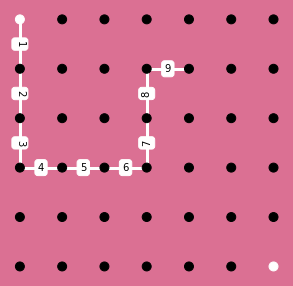

In [ ]:
def draw_graph_initial(g):
    global initial_points
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    # im = image.imread('pilgrim.png')
    # imsize = 0.05 # this is the image size
    nx.draw(g, pos=node_positions,
               edge_color=['white' if g[u][v].get('trodden') else 'palevioletred' for (u,v) in g.edges],
               width=3,
               node_size=80,
               node_color=['white' if n in (AA[0]+BB[0], AA[-1]+BB[-1]) else 'k' for n in g.nodes])
    nx.draw_networkx_edge_labels(g, pos=node_positions,
        edge_labels={(AA[u[0]] + BB[u[1]], AA[v[0]] + BB[v[1]]): str(i+1) for (i, (u,v)) in enumerate(zip(initial_points[:-1], initial_points[1:]))})
    ax.set_facecolor('palevioletred')
    ax.axis('off')
    fig.set_facecolor('palevioletred')
    ims = []
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    imsize = 0.12 # this is the image size
    (x,y) = node_positions[AA[initial_points[-1][0]] + BB[initial_points[-1][1]]]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.set_aspect('equal')
    a.axis('off')
    for i in range(1, 7):
        ## Read in picture
        fname = "Sprite-000"+str(i)+".png" 
        img = image.imread(fname)
        imgplot = a.imshow(img)

        # append AxesImage object to the list
        ims.append([imgplot])
    global ani
    ani = animation.ArtistAnimation(fig, ims, interval=80, blit=True,
                                repeat_delay=10)
    ani = ani.to_html5_video()
    plt.clf()
#     trans = ax.transData.transform
#     trans2 = fig.transFigure.inverted().transform
#     imsize = 0.1 # this is the image size
#     plt.title(f'Initial Map: \nDestination: bottom-right corner\n\nMove cost:\nNorth: /{move_cost[0]}      South: *{move_cost[1]}\nWest: -{move_cost[2]}     East: +{move_cost[3]}\n\n')
#     (x,y) = node_positions[AA[initial_points[-1][0]] + BB[initial_points[-1][1]]]
#     xx,yy = trans((x,y)) # figure coordinates
#     xa,ya = trans2((xx,yy)) # axes coordinates
#     a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
#     a.imshow(im)
#     a.set_aspect('equal')
#     a.axis('off')

def draw_graph(g):
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    nx.draw(g, pos=node_positions,
               edge_color=['white' if g[u][v].get('trodden') else 'palevioletred' for (u,v) in g.edges],
               width=3,
               node_size=80,
               node_color=['white' if n in (AA[0]+BB[0], AA[-1]+BB[-1]) else 'k' for n in g.nodes])
    ax.set_facecolor('palevioletred')
    ax.axis('off')
    fig.set_facecolor('palevioletred')
    
for i in range(1, len(initial_points)):
    g[AA[initial_points[i-1][0]] + BB[initial_points[i-1][1]]][AA[initial_points[i][0]] + BB[initial_points[i][1]]]['trodden'] = True
draw_graph_initial(g)

In [ ]:
display(HTML('<div style="font-family: monospace;font-weight:bold;padding:1%"><img style="z-index:-111111;position:absolute;height:95%;width:85%" src="background.gif"/><div style="color:white;margin-left:5%;"><p style="font-size:1.5em;font-weight:bold"><br>Move cost:</p><p>North: <b>/'+str(move_cost[0])+'</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;South: <b>*'+str(move_cost[1])+'</b></p><p>West: <b>-'+str(move_cost[2])+'</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;East: +<b>'+str(move_cost[3])+'</b></p><br><p>Starting Point: (0, 0)</p><p>Destination: '+str((m-1, n-1))+'</p><br>'+ani+'</div></div>'))

**Visualization Functions for Optimal Solution:**

*Cost explain for each step:*

In [ ]:
def explain_cost(best_path):
    expl = []
    cost = 0
    for i in range(1, len(best_path)):
        if best_path[i][0] == best_path[i - 1][0]:
            if best_path[i][1] - best_path[i - 1][1] == 1:
                cost += move_cost[3]
            else:
                cost -= move_cost[2]
        else:
            if best_path[i][0] - best_path[i - 1][0] == 1:
                cost *= move_cost[1]
            else:
                cost /= move_cost[0]
        expl.append(f'<p style="font-family: monospace;font-weight:bold;">Current cost from {best_path[i-1]} to {best_path[i]}: &nbsp;&nbsp;&nbsp;{cost}</p>')
    explain = expl[:3] + ['<p>...</p>'] + expl[-3:]
    explain = ''.join(explain)
    return explain

*Draw optimal path:*

In [ ]:
def draw_path(best_path, min_cost):
    g = make_graph()
    for i in range(1, len(best_path)):
        g[AA[best_path[i-1][0]] + BB[best_path[i-1][1]]][AA[best_path[i][0]] + BB[best_path[i][1]]]['trodden'] = True
    draw_graph(g)
    nx.draw_networkx_edge_labels(g, pos=node_positions,
        edge_labels={(AA[u[0]] + BB[u[1]], AA[v[0]] + BB[v[1]]): str(i+1) for (i, (u,v)) in enumerate(zip(best_path[:-1], best_path[1:]))})
    # im = image.imread('pilgrim.png')
    ax=plt.gca()
    fig=plt.gcf()
    # trans = ax.transData.transform
    # trans2 = fig.transFigure.inverted().transform
    # imsize = 0.1 # this is the image size
    # (x,y) = node_positions[AA[m-1] + BB[n-1]]
    # xx,yy = trans((x,y)) # figure coordinates
    # xa,ya = trans2((xx,yy)) # axes coordinates
    # a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    # a.imshow(im)
    # a.set_aspect('equal')
    # a.axis('off')
    ims = []
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    imsize = 0.12 # this is the image size
    # plt.title(f'Initial Map: \nDestination: bottom-right corner\n\nMove cost:\nNorth: /{move_cost[0]}      South: *{move_cost[1]}\nWest: -{move_cost[2]}     East: +{move_cost[3]}\n\n')
    (x,y) = node_positions[AA[m-1] + BB[n-1]]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.set_aspect('equal')
    a.axis('off')
    for i in range(1, 7):
        ## Read in picture
        fname = "Sprite-000"+str(i)+".png" 
        img = image.imread(fname)
        imgplot = a.imshow(img)

        # append AxesImage object to the list
        ims.append([imgplot])
    global ani
    ani = animation.ArtistAnimation(fig, ims, interval=80, blit=True,
                                repeat_delay=10)
    ani = ani.to_html5_video()
    plt.clf()
    display(HTML('<div style="font-family: monospace;font-weight:bold;padding:1%"><img style="z-index:-111111;position:absolute;height:95%;width:90%" src="background.gif"/><div style="color:white;margin-left:5%;margin-bottom:1%;display:inline-block;width: 50%"><p style="font-size:1.5em;font-weight:bold"><br>Move cost:</p><p>North: <b>/'+str(move_cost[0])+'</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;South: <b>*'+str(move_cost[1])+'</b></p><p>West: <b>-'+str(move_cost[2])+'</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;East: +<b>'+str(move_cost[3])+'</b></p><br><p>Starting Point: (0, 0)</p><p>Destination: '+str((m-1, n-1))+'</p><br><p>Optimal cost: <b>'+str(min_cost)+'</b></p><br>'+ani+'</div><div style="position:absolute; bottom: 15%; right: 5%;color:white;"><br>'+explain_cost(best_path)+'</div></div>'))

# Backtracking Approach

**Initialization**

In [ ]:
class Point:
    def __init__(self, coordinate):
        self.coordinate = coordinate
        # possible_move: North, South, West, East
        self.possible_move = [1, 1, 1, 1]

    def go_up(self):
        new_position = list(self.coordinate)
        if new_position[0] <= 0:
            return None
        else:
            new_position[0] -= 1
            return tuple(new_position)

    def go_down(self):
        new_position = list(self.coordinate)
        if new_position[0] >= m - 1:
            return None
        else:
            new_position[0] += 1
            return tuple(new_position)

    def go_left(self):
        new_position = list(self.coordinate)
        if new_position[1] <= 0:
            return None
        else:
            new_position[1] -= 1
            return tuple(new_position)

    def go_right(self):
        new_position = list(self.coordinate)
        if new_position[1] >= n - 1:
            return None
        else:
            new_position[1] += 1
            return tuple(new_position)

    def get_position(self):
        return self.coordinate


all_points = []
for i in range(m):
    row = []
    for j in range(n):
        row.append(Point((i, j)))
    all_points.append(row)

all_points[0][0].possible_move = [0, 1, 0, 1]
all_points[m - 1][n - 1].possible_move = [0, 0, 0, 0]
initial_path = [all_points[0][0]]
stack_cost = [0]
min_cost = 10e9
count = 0
best_path = []

for s in initial_sequence:
    if s == 'n':
        new_coordinate = initial_path[-1].go_up()
        if new_coordinate is not None:
            initial_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
            initial_path[-2].possible_move[0] = 0
            initial_path[-1].possible_move[1] = 0
            stack_cost[0] /= move_cost[0]
    elif s == 's':
        new_coordinate = initial_path[-1].go_down()
        if new_coordinate is not None:
            initial_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
            initial_path[-2].possible_move[1] = 0
            initial_path[-1].possible_move[0] = 0
            stack_cost[0] *= move_cost[1]
    elif s == 'w':
        new_coordinate = initial_path[-1].go_left()
        if new_coordinate is not None:
            initial_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
            initial_path[-2].possible_move[2] = 0
            initial_path[-1].possible_move[3] = 0
            stack_cost[0] -= move_cost[2]
    elif s == 'e':
        new_coordinate = initial_path[-1].go_right()
        if new_coordinate is not None:
            initial_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
            initial_path[-2].possible_move[3] = 0
            initial_path[-1].possible_move[2] = 0
            stack_cost[0] += move_cost[3]
stack_path = [initial_path]

**Solution Function:**

In [ ]:
def Solution(current_path, current_cost):
    global min_cost, all_points, best_path, count
    if current_cost < min_cost:
        min_cost = current_cost
        count += 1
        print('Count: ', count)
        print('Current minimum cost:', current_cost)
        best_path = [x.get_position() for x in current_path]
        print('\n')
        # clear_output(wait=True)

**Bounding Function** 

In [ ]:
def Bounding(current_cost, current_path):
#     global all_points, min_cost, best_path
#     if (math.exp(- current_cost / 10000)) * (min(move_cost[0], move_cost[1]) ** (m - current_path[-1].get_position()[0])) > math.exp(- min_cost / 10000):
#         return True
#     else:
#         return False
    return True

**Backtracking Function**

In [ ]:
def Backtracking():
    global stack_path, min_cost, move_cost, all_points, stack_cost, count, best_path
    if len(stack_path) == 0:
        return
    current_path = stack_path.pop()
    current_cost = stack_cost.pop()
    current_node = current_path[-1]
    for v in range(4):
        if current_node.possible_move[v] == 1:
            if v == 0:
                if current_node.go_up() is not None:
                    new_coordinate = current_node.go_up()
                    current_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
                    current_cost /= move_cost[0]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[1] = 0
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[0] = 0
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and Bounding(current_cost,
                                                                                     current_path):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        Backtracking()
                    current_path.pop()
                    current_cost *= move_cost[0]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[1] = 1
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[0] = 1
            elif v == 1:
                if current_node.go_down() is not None:
                    new_coordinate = current_node.go_down()
                    current_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
                    current_cost *= move_cost[1]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[0] = 0
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[1] = 0
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and Bounding(current_cost,
                                                                                     current_path):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        Backtracking()
                    current_path.pop()
                    current_cost /= move_cost[1]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[0] = 1
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[1] = 1
            elif v == 2:
                if current_node.go_left() is not None:
                    new_coordinate = current_node.go_left()
                    current_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
                    current_cost -= move_cost[2]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[3] = 0
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[2] = 0
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and Bounding(current_cost,
                                                                                     current_path):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        Backtracking()
                    current_path.pop()
                    current_cost += move_cost[2]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[3] = 1
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[2] = 1
            elif v == 3:
                if current_node.go_right() is not None:
                    new_coordinate = current_node.go_right()
                    current_path.append(all_points[new_coordinate[0]][new_coordinate[1]])
                    current_cost += move_cost[3]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[2] = 0
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[3] = 0
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and Bounding(current_cost,
                                                                                     current_path):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        Backtracking()
                    current_path.pop()
                    current_cost -= move_cost[3]
                    all_points[new_coordinate[0]][new_coordinate[1]].possible_move[2] = 1
                    all_points[current_node.get_position()[0]][current_node.get_position()[1]].possible_move[3] = 1

t0 = timeit.default_timer()
Backtracking()
print("Time:", timeit.default_timer() - t0)

Count:  1
Current minimum cost: 378.00000000000057


Count:  2
Current minimum cost: 149.00000000000054


Count:  3
Current minimum cost: 124.00000000000054


Count:  4
Current minimum cost: 117.00000000000054


Count:  5
Current minimum cost: 110.00000000000054


Count:  6
Current minimum cost: 102.00000000000054


Count:  7
Current minimum cost: 89.00000000000054


Count:  8
Current minimum cost: 77.00000000000055


Count:  9
Current minimum cost: 70.00000000000055


Count:  10
Current minimum cost: 39.00000000000056


Count:  11
Current minimum cost: 19.00000000000056


Count:  12
Current minimum cost: 14.000000000000572


Count:  13
Current minimum cost: 2.000000000000572


Count:  14
Current minimum cost: -4.999999999999428


Count:  15
Current minimum cost: -18.99999999999944


Count:  16
Current minimum cost: -25.99999999999944


Count:  17
Current minimum cost: -90.99999999999946


Count:  18
Current minimum cost: -125.99999999999946


Count:  19
Current minimum cost: -160.9999

**Visualization**

In [ ]:
draw_path(best_path, min_cost)

# Modified Backtracking

Initialization

In [ ]:
class Point:
    def __init__(self, coordinate):
        self.coordinate = coordinate
        # possible_move: North, South, West, East
        self.possible_move = [1, 1, 1, 1]

    def go_up(self):
        new_position = list(self.coordinate)
        if new_position[0] < 0:
            return False
        else:
            new_position[0] -= 1
            return tuple(new_position)

    def go_down(self):
        new_position = list(self.coordinate)
        if new_position[0] > m - 1:
            return False
        else:
            new_position[0] += 1
            return tuple(new_position)

    def go_left(self):
        new_position = list(self.coordinate)
        if new_position[1] < 0:
            return False
        else:
            new_position[1] -= 1
            return tuple(new_position)

    def go_right(self):
        new_position = list(self.coordinate)
        if new_position[1] > n - 1:
            return False
        else:
            new_position[1] += 1
            return tuple(new_position)

    def get_position(self):
        return self.coordinate
 
cost_dict = {}
closed_nodes = []
all_points = {}
for i in range(m):
    for j in range(n):
        all_points[(i, j)] = Point((i, j))
for i in range(1,m):
    all_points[(i, 0)].possible_move = [1, 1, 0, 1]
    all_points[(i, n-1)].possible_move = [1, 1, 1, 0]
for j in range(1,n):
    all_points[(0, j)].possible_move = [0, 1, 1, 1]
    all_points[(m-1, j)].possible_move = [1, 0, 1, 1]
all_points[(0, 0)].possible_move = [0, 1, 0, 1]
all_points[(m-1, 0)].possible_move = [1, 0, 0, 1]
all_points[(0, n-1)].possible_move = [0, 1, 1, 0]
all_points[(m - 1, n - 1)].possible_move = [0, 0, 0, 0]
initial_path = [all_points[(0,0)]]
initial_cost = [0]

min_cost = 999999
count = 0
best_path = []
best_cost={}
initial_path = [all_points[(0,0)]]
stack_cost = [0]


for s in initial_sequence:
    if s == 'n':
        new_coordinate = initial_path[-1].go_up()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[0] = 0
            initial_path[-1].possible_move[1] = 0
            stack_cost[0] /= move_cost[0]
    elif s == 's':
        new_coordinate = initial_path[-1].go_down()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[1] = 0
            initial_path[-1].possible_move[0] = 0
            stack_cost[0] *= move_cost[1]
    elif s == 'w':
        new_coordinate = initial_path[-1].go_left()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[2] = 0
            initial_path[-1].possible_move[3] = 0
            stack_cost[0] -= move_cost[2]
    elif s == 'e':
        new_coordinate = initial_path[-1].go_right()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[3] = 0
            initial_path[-1].possible_move[2] = 0
            stack_cost[0] += move_cost[3]
def_cost = stack_cost[:]

def restrict(current_node, dir):  # Cant go through the same path, return next node coordinate
    if dir == 0:  # Up
        new_coordinate = current_node.go_up()
        all_points[new_coordinate].possible_move[1] = 0
        current_node.possible_move[0] = 0
    if dir == 1:  # Down
        new_coordinate = current_node.go_down()
        all_points[new_coordinate].possible_move[0] = 0
        current_node.possible_move[1] = 0
    if dir == 2:  # Left
        new_coordinate = current_node.go_left()
        all_points[new_coordinate].possible_move[3] = 0
        current_node.possible_move[2] = 0
    if dir == 3:  # Right
        new_coordinate = current_node.go_right()
        all_points[new_coordinate].possible_move[2] = 0
        current_node.possible_move[3] = 0
    return new_coordinate 
def close_node_initial(current_considered_node):
    if current_considered_node == all_points[(m - 1, n - 1)] or current_considered_node == initial_path[-1]:
        return
    if current_considered_node.possible_move.count(1)==1:
        dir_to_remove = current_considered_node.possible_move.index(1)
        new_node_coor = restrict(current_considered_node, dir_to_remove)
        close_node_initial(all_points[new_node_coor])
for node in initial_path:
    close_node_initial(node)
stack_path = [initial_path]

Solution Function:

In [ ]:
def Solution(current_path, current_cost):
    global min_cost, all_points, best_path, count
    if current_cost < min_cost:
        min_cost = current_cost
        count += 1
        print('Count: ', count)
        print('Current minimum cost:', current_cost)
        best_path = [x.get_position() for x in current_path]
        print(best_path)
        print('\n')
        clear_output(wait=True)

Forward checking and loop check


In [ ]:
def loop_check(new_node,current_path,stack_cost):
    if new_node in current_path[:-1]:
        key = tuple(current_path)
        if key in cost_dict:
          if stack_cost >= cost_dict[key]:
              del(cost_dict[key])
              return False
          else:
            del(cost_dict[key])
            return True
        else:
          i = current_path.index(new_node,0,-1)
          corresponding_path = tuple(current_path[0:i].copy()+current_path[-1:i-1:-1].copy())
          cost_dict[corresponding_path] = stack_cost
          return True
    else: 
      return True

def unrestrict(current_node, dir):  # undo restrict
    if current_node != all_points[(m - 1, n - 1)]:
        if dir == 0:  # Up
            if current_node.go_up() is not False:
                new_coordinate = current_node.go_up()
                all_points[new_coordinate].possible_move[1] = 1
                current_node.possible_move[0] = 1
        if dir == 1:  # Down
            if current_node.go_down() is not False:
                new_coordinate = current_node.go_down()
                all_points[new_coordinate].possible_move[0] = 1
                current_node.possible_move[1] = 1
        if dir == 2:  # Left
            if current_node.go_left() is not False:
                new_coordinate = current_node.go_left()
                all_points[new_coordinate].possible_move[3] = 1
                current_node.possible_move[2] = 1
        if dir == 3:  # Right
            if current_node.go_right() is not False:
                new_coordinate = current_node.go_right()
                all_points[new_coordinate].possible_move[2] = 1
                current_node.possible_move[3] = 1

 
def close_node(current_considered_node,new_coordinate):
    if current_considered_node == all_points[(m - 1, n - 1)] or current_considered_node ==all_points[(new_coordinate)]:
        return
    if current_considered_node.possible_move.count(1)==1:
        dir_to_remove = current_considered_node.possible_move.index(1)
        new_node_coor = restrict(current_considered_node, dir_to_remove)
        closed_nodes[-1].append((current_considered_node, dir_to_remove))
        close_node(all_points[new_node_coor],new_coordinate)
def magellan_calc(current_node): #calculate the min. number of path to reach the goal
    i,j =current_node.coordinate
    return m-1-i+n-1-j

Backtrack

In [ ]:
def mBacktracking():
    global stack_path, min_cost, move_cost, all_points, stack_cost, count, best_path
    if len(stack_path) == 0:
        return
    current_path = stack_path.pop()
    current_cost = stack_cost.pop()
    current_node = current_path[-1]
    for v in range(4):
        if current_node.possible_move[v] == 1:
            if v == 0:
                if current_node.go_up() is not False:
                    new_coordinate = current_node.go_up()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost /= move_cost[0]
                    restrict(current_node, 0)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        mBacktracking()
                    current_path.pop()
                    current_cost *= move_cost[0]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 0)
            elif v == 1:
                if current_node.go_down() is not False:
                    new_coordinate = current_node.go_down()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost *= move_cost[1]
                    restrict(current_node, 1)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        mBacktracking()
                    current_path.pop()
                    current_cost /= move_cost[1]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 1)
            elif v == 2:
                if current_node.go_left() is not False:
                    new_coordinate = current_node.go_left()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost -= move_cost[2]
                    restrict(current_node, 2)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        mBacktracking()
                    current_path.pop()
                    current_cost += move_cost[2]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 2)
            elif v == 3:
                if current_node.go_right() is not False:
                    new_coordinate = current_node.go_right()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost += move_cost[3]
                    restrict(current_node, 3)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        mBacktracking()
                    current_path.pop()
                    current_cost -= move_cost[3]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 3)
t0 = timeit.default_timer()
mBacktracking()
print('Time: ',timeit.default_timer() - t0)

KeyboardInterrupt: ignored

**Visualization**

In [ ]:
draw_path(best_path, min_cost)

# Iterative Backtracking

**Initialization**

In [7]:
class Point:
    def __init__(self, coordinate):
        self.coordinate = coordinate
        # possible_move: North, South, West, East
        self.possible_move = [1, 1, 1, 1]

    def go_up(self):
        new_position = list(self.coordinate)
        if new_position[0] < 0:
            return False
        else:
            new_position[0] -= 1
            return tuple(new_position)

    def go_down(self):
        new_position = list(self.coordinate)
        if new_position[0] > m - 1:
            return False
        else:
            new_position[0] += 1
            return tuple(new_position)

    def go_left(self):
        new_position = list(self.coordinate)
        if new_position[1] < 0:
            return False
        else:
            new_position[1] -= 1
            return tuple(new_position)

    def go_right(self):
        new_position = list(self.coordinate)
        if new_position[1] > n - 1:
            return False
        else:
            new_position[1] += 1
            return tuple(new_position)

    def get_position(self):
        return self.coordinate

 
cost_dict = {}
closed_nodes = []
all_points = {}
for i in range(m):
    for j in range(n):
        all_points[(i, j)] = Point((i, j))
for i in range(1,m):
    all_points[(i, 0)].possible_move = [1, 1, 0, 1]
    all_points[(i, n-1)].possible_move = [1, 1, 1, 0]
for j in range(1,n):
    all_points[(0, j)].possible_move = [0, 1, 1, 1]
    all_points[(m-1, j)].possible_move = [1, 0, 1, 1]
all_points[(0, 0)].possible_move = [0, 1, 0, 1]
all_points[(m-1, 0)].possible_move = [1, 0, 0, 1]
all_points[(0, n-1)].possible_move = [0, 1, 1, 0]
all_points[(m - 1, n - 1)].possible_move = [0, 0, 0, 0]
initial_path = [all_points[(0,0)]]
initial_cost = [0]

min_cost = 999999
count = 0
best_path = []
best_cost={}
initial_path = [all_points[(0,0)]]
stack_cost = [0]
cut_off  = []

for s in initial_sequence:
    if s == 'n':
        new_coordinate = initial_path[-1].go_up()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[0] = 0
            initial_path[-1].possible_move[1] = 0
            stack_cost[0] /= move_cost[0]
    elif s == 's':
        new_coordinate = initial_path[-1].go_down()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[1] = 0
            initial_path[-1].possible_move[0] = 0
            stack_cost[0] *= move_cost[1]
    elif s == 'w':
        new_coordinate = initial_path[-1].go_left()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[2] = 0
            initial_path[-1].possible_move[3] = 0
            stack_cost[0] -= move_cost[2]
    elif s == 'e':
        new_coordinate = initial_path[-1].go_right()
        if new_coordinate is not False:
            initial_path.append(all_points[new_coordinate])
            initial_path[-2].possible_move[3] = 0
            initial_path[-1].possible_move[2] = 0
            stack_cost[0] += move_cost[3]
def_cost = stack_cost[:]

def restrict(current_node, dir):  # Cant go through the same path, return next node coordinate
    if dir == 0:  # Up
        new_coordinate = current_node.go_up()
        all_points[new_coordinate].possible_move[1] = 0
        current_node.possible_move[0] = 0
    if dir == 1:  # Down
        new_coordinate = current_node.go_down()
        all_points[new_coordinate].possible_move[0] = 0
        current_node.possible_move[1] = 0
    if dir == 2:  # Left
        new_coordinate = current_node.go_left()
        all_points[new_coordinate].possible_move[3] = 0
        current_node.possible_move[2] = 0
    if dir == 3:  # Right
        new_coordinate = current_node.go_right()
        all_points[new_coordinate].possible_move[2] = 0
        current_node.possible_move[3] = 0
    return new_coordinate 
def close_node_initial(current_considered_node):
    if current_considered_node == all_points[(m - 1, n - 1)] or current_considered_node == initial_path[-1]:
        return
    if current_considered_node.possible_move.count(1)==1:
        dir_to_remove = current_considered_node.possible_move.index(1)
        new_node_coor = restrict(current_considered_node, dir_to_remove)
        close_node_initial(all_points[new_node_coor])
for node in initial_path:
    close_node_initial(node)
stack_path = [initial_path]

**Solution Function**

In [3]:
def Solution(current_path, current_cost):
    global min_cost, all_points, best_path, count, best_cost
    path=(x.get_position() for x in current_path[:])
    if len(current_path) not in best_cost:
        best_cost[len(current_path)]=current_cost
    else:
        if best_cost[len(current_path)]>current_cost:
            best_cost[len(current_path)]=current_cost
    if current_cost < min_cost:
        min_cost = current_cost
        count += 1
        print('Count: ', count)
        print('Current minimum cost:', current_cost)
        print('Current optimal path:')
        best_path = [x.get_position() for x in current_path]
        print(best_path)
        print('Length of optimal path:', len(best_path))
        print('\n')
        clear_output(wait=True)

**Close Nodes & Loop Check**

In [4]:
def loop_check(new_node,current_path,stack_cost):
    if new_node in current_path[:-1]:
        key = tuple(current_path)
        if key in cost_dict:
          if stack_cost >= cost_dict[key]:
              del(cost_dict[key])
              return False
          else:
            del(cost_dict[key])
            return True
        else:
          i = current_path.index(new_node,0,-1)
          corresponding_path = tuple(current_path[0:i].copy()+current_path[-1:i-1:-1].copy())
          cost_dict[corresponding_path] = stack_cost
          return True
    else: 
      return True

def unrestrict(current_node, dir):  # undo restrict
    if current_node != all_points[(m - 1, n - 1)]:
        if dir == 0:  # Up
            if current_node.go_up() is not False:
                new_coordinate = current_node.go_up()
                all_points[new_coordinate].possible_move[1] = 1
                current_node.possible_move[0] = 1
        if dir == 1:  # Down
            if current_node.go_down() is not False:
                new_coordinate = current_node.go_down()
                all_points[new_coordinate].possible_move[0] = 1
                current_node.possible_move[1] = 1
        if dir == 2:  # Left
            if current_node.go_left() is not False:
                new_coordinate = current_node.go_left()
                all_points[new_coordinate].possible_move[3] = 1
                current_node.possible_move[2] = 1
        if dir == 3:  # Right
            if current_node.go_right() is not False:
                new_coordinate = current_node.go_right()
                all_points[new_coordinate].possible_move[2] = 1
                current_node.possible_move[3] = 1

 
def close_node(current_considered_node,new_coordinate):
    if current_considered_node == all_points[(m - 1, n - 1)] or current_considered_node ==all_points[(new_coordinate)]:
        return
    if current_considered_node.possible_move.count(1)==1:
        dir_to_remove = current_considered_node.possible_move.index(1)
        new_node_coor = restrict(current_considered_node, dir_to_remove)
        closed_nodes[-1].append((current_considered_node, dir_to_remove))
        close_node(all_points[new_node_coor],new_coordinate)
def manhattan_calc(current_node): #calculate the min. number of path to reach the goal
    i,j =current_node.coordinate
    return m-1-i+n-1-j

**Iterative Backtracking**

In [8]:
def BacktrackingIterStart(depth):
    global stack_path, min_cost, move_cost, all_points, stack_cost, count, best_path
    stack_path = [initial_path[:]]
    stack_cost = def_cost[:]
    BacktrackingIter(depth)

def BacktrackingIter(depth):
    global stack_path, min_cost, move_cost, all_points, stack_cost, count, best_path
    if len(stack_path) == 0:
        return
      
    current_path = stack_path.pop()
    current_cost = stack_cost.pop()
    current_node = current_path[-1]
    if manhattan_calc(current_node) > depth - len(current_path):
        return
    for v in range(4):
        if current_node.possible_move[v] == 1:
            if v == 0:
                if current_node.go_up() is not False:
                    new_coordinate = current_node.go_up()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost /= move_cost[0]
                    restrict(current_node, 0)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        BacktrackingIter(depth)
                    current_path.pop()
                    current_cost *= move_cost[0]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 0)
            elif v == 1:
                if current_node.go_down() is not False:
                    new_coordinate = current_node.go_down()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost *= move_cost[1]
                    restrict(current_node, 1)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        BacktrackingIter(depth)
                    current_path.pop()
                    current_cost /= move_cost[1]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 1)
            elif v == 2:
                if current_node.go_left() is not False:
                    new_coordinate = current_node.go_left()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost -= move_cost[2]
                    restrict(current_node, 2)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        BacktrackingIter(depth)
                    current_path.pop()
                    current_cost += move_cost[2]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 2)
            elif v == 3:
                if current_node.go_right() is not False:
                    new_coordinate = current_node.go_right()
                    new_node = all_points[new_coordinate]
                    current_path.append(all_points[new_coordinate])
                    closed_nodes.append([])
                    current_cost += move_cost[3]
                    restrict(current_node, 3)
                    close_node(current_node,new_coordinate)
                    if current_path[-1].get_position() == (m - 1, n - 1):
                        Solution(current_path, current_cost)
                    elif current_path[-1].possible_move != [0, 0, 0, 0] and loop_check(new_node,current_path,current_cost):
                        stack_path.append(current_path)
                        stack_cost.append(current_cost)
                        BacktrackingIter(depth)
                    current_path.pop()
                    current_cost -= move_cost[3]
                    to_unclose_node = closed_nodes.pop()
                    for (node, dir) in to_unclose_node:
                        unrestrict(node, dir)
                    unrestrict(current_node, 3)

i = manhattan_calc(initial_path[0])+1
t0 = timeit.default_timer()
iter_count = 0
while True:
    old_best_cost = len(best_cost)
    BacktrackingIterStart(i)
    updated = old_best_cost != len(best_cost)
    if len(best_cost)>=1 and not updated: #preventing unlimited run
        if iter_count >= 4:
            break
        else: iter_count += 1
    if len(best_cost)>=4:
        if len(best_cost) !=0 and not updated :
            break
        if min_cost <= 0 and best_cost[i]>best_cost[i-2] and best_cost[i]>best_cost[i-4]:
            break
    i+=2
print('Time: ',timeit.default_timer()-t0)

KeyboardInterrupt: ignored

**Visualization**

In [ ]:
draw_path(best_path, min_cost)

# Breadth-first Search Approach:


**Import stuff**


In [ ]:
from collections import deque
import timeit

**Create class node**

In [ ]:
class node():
    def __init__(self, coordinates = (0,0), path = (), tax: float = 0, action_sequence = ()):
        self.coordinates = coordinates
        self.available_dir = ['w', 'e', 's', 'n']
        self.path = path
        if self.coordinates[0] == 0 or {self.coordinates, (self.coordinates[0] - 1, self.coordinates[1])} in self.path:
            self.available_dir.remove('n')
        if self.coordinates[0] == m-1 or {self.coordinates, (self.coordinates[0] + 1, self.coordinates[1])} in self.path:
            self.available_dir.remove('s')
        if self.coordinates[1] == 0 or {self.coordinates, (self.coordinates[0], self.coordinates[1] - 1)} in self.path:
            self.available_dir.remove('w')
        if self.coordinates[1] == n-1 or {self.coordinates, (self.coordinates[0], self.coordinates[1] + 1)} in self.path:
            self.available_dir.remove('e')
        self.tax = tax
        self.action_sequence = action_sequence

**Expand node**

In [ ]:
def ExpandNode(current: node):
    global thequeue
    if not current.available_dir:
        return
    tax = 0
    to_coordinates = ()
    action_sequence = ()
    for dir in current.available_dir:
        if dir == 'e':
            tax = current.tax + cost[dir]
            to_coordinates = (current.coordinates[0], current.coordinates[1] + 1)
            action_sequence = current.action_sequence + (dir,)
        elif dir == 'w':
            tax = current.tax - cost[dir]
            to_coordinates = (current.coordinates[0], current.coordinates[1] - 1)
            action_sequence = current.action_sequence + (dir,)
        elif dir == 's':
            tax = current.tax * cost[dir]
            to_coordinates = (current.coordinates[0] + 1, current.coordinates[1])
            action_sequence = current.action_sequence + (dir,)
        elif dir == 'n':
            tax = current.tax / cost[dir]
            to_coordinates = (current.coordinates[0] - 1, current.coordinates[1])
            action_sequence = current.action_sequence + (dir,)
        path = current.path + ({current.coordinates, to_coordinates},)
        toNode = node(coordinates=to_coordinates, path=path, tax=tax, action_sequence=action_sequence)
        thequeue.append(toNode)
    return

**Check for goal**

In [ ]:
def GoalTest(node: node):
    return node.coordinates == (m-1,n-1)

**The solution function**

In [ ]:
def Solution(node: node):
    global best_tax, best_action_sequence
    if node.tax < best_tax:
        best_tax = node.tax
        best_action_sequence = node.action_sequence
    return

**Search algorithm**

In [ ]:
def PilgrimBreadthFirst():
    global thequeue
    while thequeue:
        current = thequeue.popleft()
        if GoalTest(current):
            Solution(current)
            del current
        else:
            ExpandNode(current)
            del current
    print(best_tax)
    return

**Initiate cost**

In [ ]:
cost = {}
cost['w'] = move_cost[2]
cost['e'] = move_cost[3]
cost['s'] = move_cost[1]
cost['n'] = move_cost[0]

**We start at the initial sequence**

In [ ]:
thequeue = deque()
initial_tax = 0
point = (0,0)
next = ()
initial_path = []
for dir in initial_sequence:
    if dir == 'w':
        initial_tax -= cost[dir]
        next = (point[0], point[1]-1)
        initial_path.append({point,next})
    elif dir == 'e':
        initial_tax += cost[dir]
        next = (point[0], point[1] + 1)
        initial_path.append({point, next})
    elif dir == 's':
        initial_tax *= cost[dir]
        next = (point[0] + 1, point[1])
        initial_path.append({point, next})
    elif dir == 'n':
        initial_tax /= cost[dir]
        next = (point[0] - 1, point[1])
        initial_path.append({point, next})
    point = next
thequeue.append(node(coordinates = point, tax = initial_tax, path = tuple(initial_path), action_sequence = tuple(initial_sequence)))

**Search for the solution**

In [ ]:
best_tax = 10e9
best_action_sequence = ()
t0 = timeit.default_timer()
PilgrimBreadthFirst()
print("Time taken to solve this problem:", timeit.default_timer() - t0)
best_path = [(0,0)]
for movement in best_action_sequence:
    if movement == 'w':
        best_path.append((best_path[-1][0], best_path[-1][1] - 1))
    elif movement == 'e':
        best_path.append((best_path[-1][0], best_path[-1][1] + 1))
    elif movement == 'n':
        best_path.append((best_path[-1][0] - 1, best_path[-1][1]))
    elif movement == 's':
        best_path.append((best_path[-1][0] + 1, best_path[-1][1]))

**Visualization**

In [ ]:
draw_path(best_path, best_tax)

# Some of the unsuccessful approaches

**Uniform cost search**\
This is basically A* search with the h(n) = 0 for all points

**Import stuff**


In [ ]:
import heapq
from dataclasses import dataclass, field
from typing import Any
import numpy as np

**Prioritized node**\
This is a subclass of class node that only compares the priority field (the tax in this case) when objects of this class are compared.

In [ ]:
@dataclass(order=True)
class pnode(node):
    def __init__(self, coordinates = (0,0), path = (), tax: float = 0, action_sequence = ()):
        super().__init__(coordinates, path, tax, action_sequence)
        self.priority = tax
        self.item: Any = field(compare=False)
    priority: float
    # item: Any

**Expand function**\
We slightly modifiy the ExpandNode function so that it is compatible with the priority queue

In [ ]:
def PExpandNode(current: pnode):
    global queue
    if not current.available_dir:
        return
    for dir in current.available_dir:
        if dir == 'e':
            tax = current.tax + cost[dir]
            to_coordinates = (current.coordinates[0], current.coordinates[1] + 1)
            action_sequence = current.action_sequence + (dir,)
        elif dir == 'w':
            tax = current.tax - cost[dir]
            to_coordinates = (current.coordinates[0], current.coordinates[1] - 1)
            action_sequence = current.action_sequence + (dir,)
        elif dir == 's':
            tax = current.tax * cost[dir]
            to_coordinates = (current.coordinates[0] + 1, current.coordinates[1])
            action_sequence = current.action_sequence + (dir,)
        elif dir == 'n':
            tax = current.tax / cost[dir]
            to_coordinates = (current.coordinates[0] - 1, current.coordinates[1])
            action_sequence = current.action_sequence + (dir,)
        path = current.path + ({current.coordinates, to_coordinates},)
        toNode = pnode(coordinates=to_coordinates, path=path, tax=tax, action_sequence=action_sequence)
        heapq.heappush(queue, toNode)
    return

**Search algorithm**\
We also slightly modify the search algorithm

In [ ]:
def PBFS():
    global queue, best_action_sequence
    while queue:
        current = heapq.heappop(queue)
        if GoalTest(current):
            print(current.tax)
            best_action_sequence = current.action_sequence
            return
        else:
            PExpandNode(current)
            del current
    return

**Preparation**\
Just like above

In [ ]:
queue = []
initial_tax = 0
point = (0, 0)
# next = ()
initial_path = []
for dir in initial_sequence:
    if dir == 'w':
        initial_tax -= cost[dir]
        next = (point[0], point[1] - 1)
        initial_path.append({point, next})
    elif dir == 'e':
        initial_tax += cost[dir]
        next = (point[0], point[1] + 1)
        initial_path.append({point, next})
    elif dir == 's':
        initial_tax *= cost[dir]
        next = (point[0] + 1, point[1])
        initial_path.append({point, next})
    elif dir == 'n':
        initial_tax /= cost[dir]
        next = (point[0] - 1, point[1])
        initial_path.append({point, next})
    point = next
heapq.heappush(queue, pnode(coordinates=point, tax=initial_tax, path=tuple(initial_path), action_sequence= tuple(initial_sequence)))

**Search for solution**

In [ ]:
t0 = timeit.default_timer()
PBFS()
print("Time taken to solve this problem:", timeit.default_timer() - t0)
best_path = [(0, 0)]
for movement in best_action_sequence:
    if movement == 'w':
        best_path.append((best_path[-1][0], best_path[-1][1] - 1))
    elif movement == 'e':
        best_path.append((best_path[-1][0], best_path[-1][1] + 1))
    elif movement == 'n':
        best_path.append((best_path[-1][0] - 1, best_path[-1][1]))
    elif movement == 's':
        best_path.append((best_path[-1][0] + 1, best_path[-1][1]))
draw_path(best_path, best_tax)